<a href="https://colab.research.google.com/github/vilemknap/vk/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Exploring Marathon Finishing Times


In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv


In [43]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [44]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [45]:
import seaborn as sns
sns.set()

In [46]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [50]:
data.dtypes

age            int64
gender        object
split         object
final         object
split_sec    float64
final_sec    float64
dtype: object

In [48]:

data['split_sec']=pd.to_timedelta(data['split'])
data['final_sec']=pd.to_timedelta(data['final'])

In [49]:
data['split_sec']=data['split_sec'].dt.total_seconds()
data['final_sec']=data['final_sec'].dt.total_seconds()

In [51]:

data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


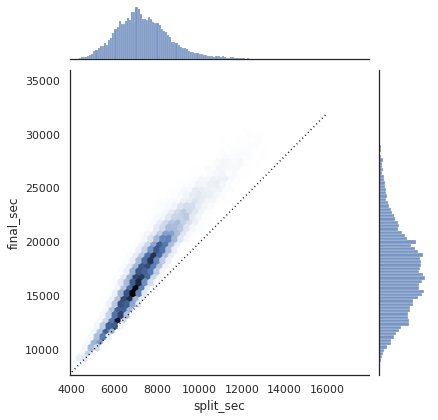

In [52]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race

In [53]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


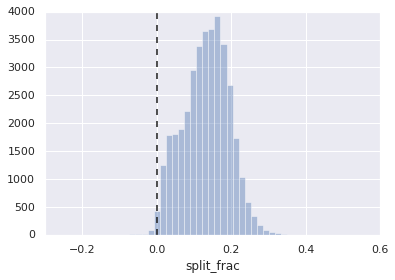

In [57]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


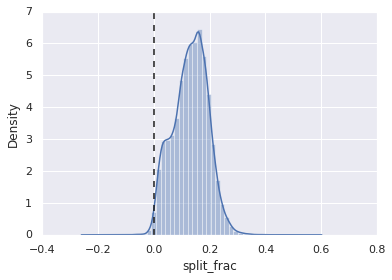

In [58]:
sns.distplot(data['split_frac'], kde=True);
plt.axvline(0, color="k", linestyle="--");

In [55]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a pairgrid, which draws plots of all these correlations:

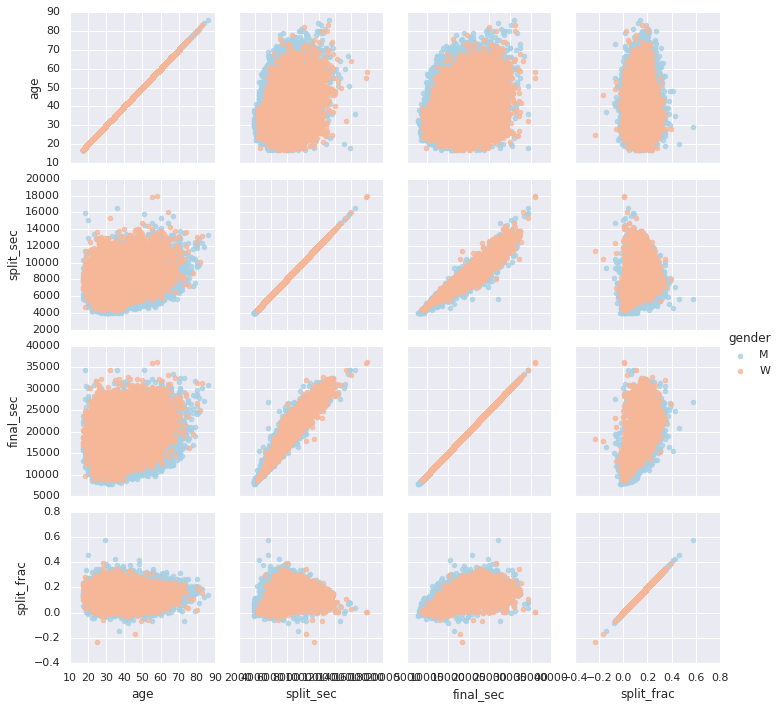

In [59]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

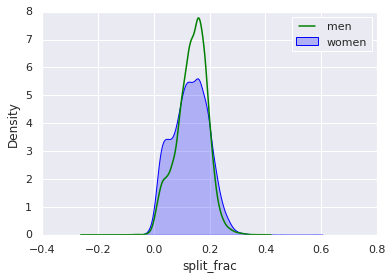

In [67]:
sns.kdeplot(data.split_frac[data.gender=='M'],color='blue', label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'],color='green', label='women', shade=False)
plt.legend(labels=['men', 'women'])
plt.xlabel('split_frac');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


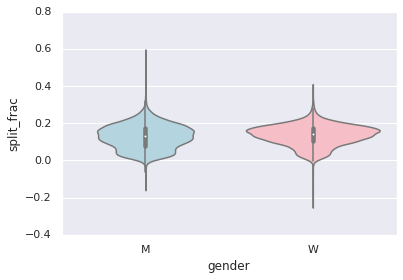

In [68]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [70]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


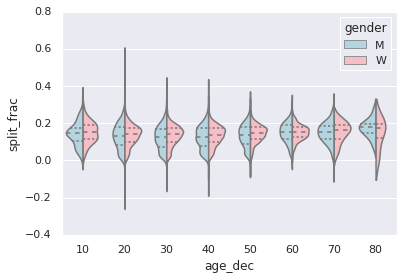

In [71]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [72]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use regplot, which will automatically fit a linear regression to the data:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


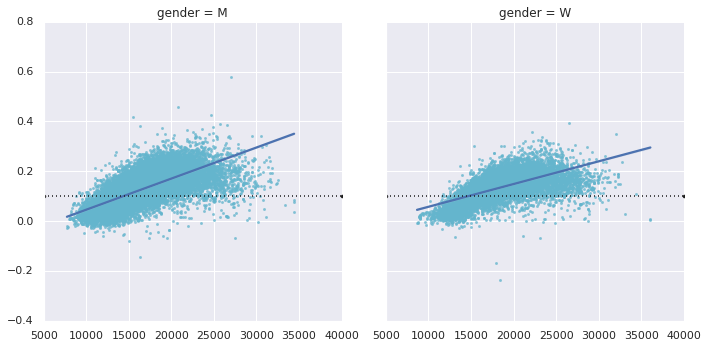

In [73]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

# Classification examples

In [79]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [74]:

from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


(-1.0, 4.0, -2.0, 7.0)

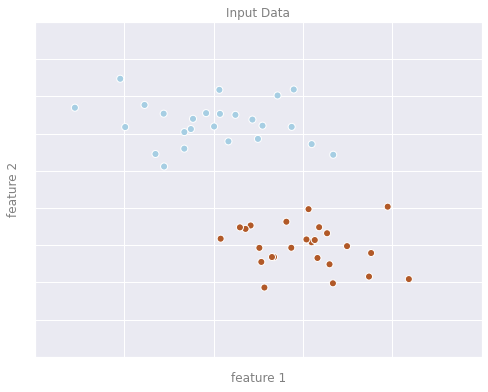

In [80]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

# fig.savefig('figures/05.01-classification-1.png')

FileNotFoundError: ignored

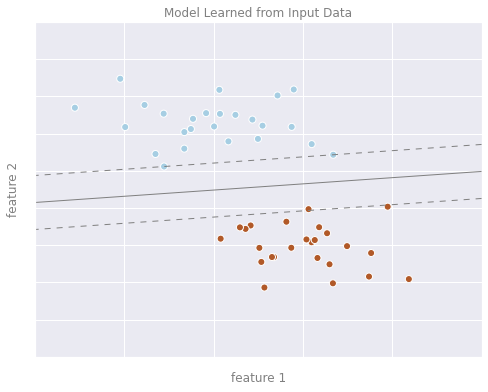

In [81]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])



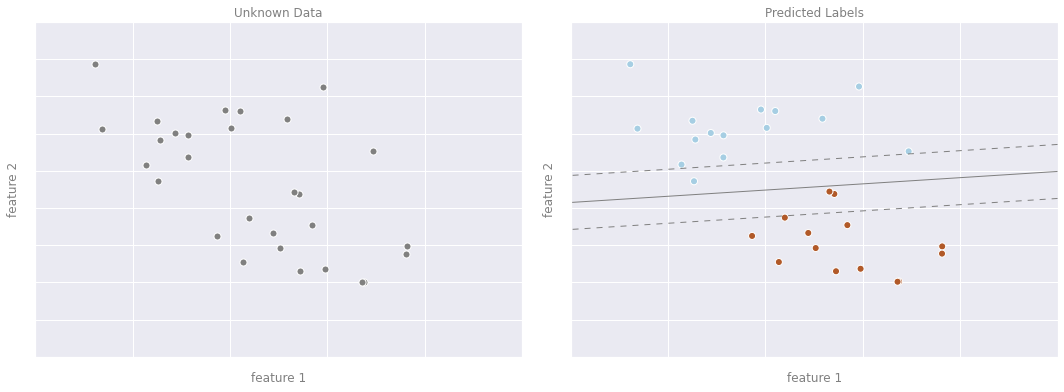

In [82]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

In [85]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

(-4.0, 4.0, -3.0, 3.0)

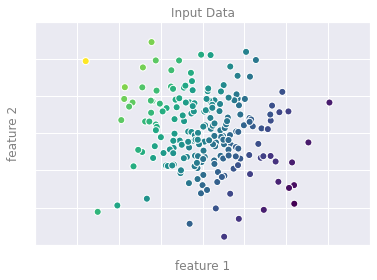

In [86]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

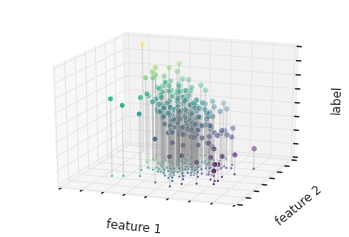

In [88]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

Notice that the feature 1–feature 2 plane here is the same as in the two-dimensional
plot from before; in this case, however, we have represented the labels by both color
and three-dimensional axis position. From this view, it seems reasonable that fitting a
plane through this three-dimensional data would allow us to predict the expected
label for any set of input parameters. Returning to the two-dimensional projection,
when we fit such a plane we get the result shown in Figure 5-6.

(-4.0, 4.0, -3.0, 3.0)

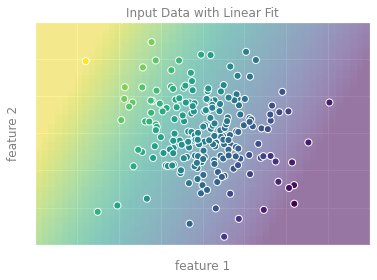

In [90]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])

This plane of fit gives us what we need to predict labels for new points. Visually, we
find the results shown in Figure 5-7.

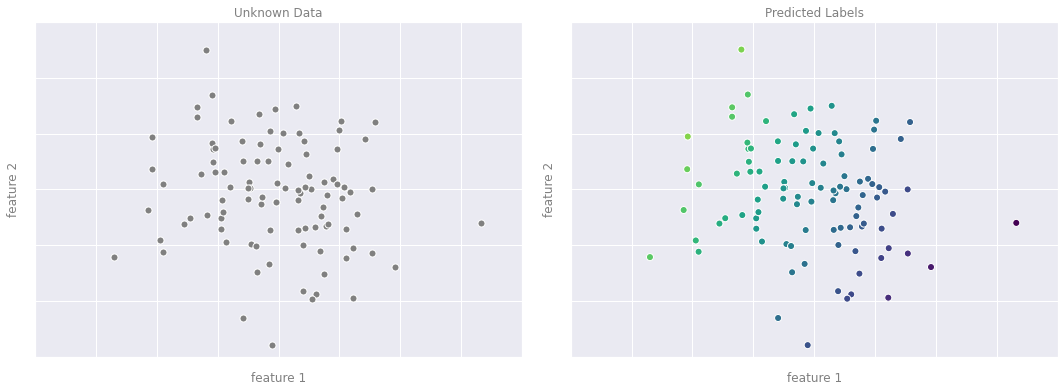

In [91]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')


As with the classification example, this may seem rather trivial in a low number of
dimensions. But the power of these methods is that they can be straightforwardly
applied and evaluated in the case of data with many, many features.
For example, this is similar to the task of computing the distance to galaxies observed
through a telescope—in this case, we might use the following features and labels:
• feature 1, 
• feature 2, etc. brightness of each galaxy at one of several wavelengths
or colors
• label distance or redshift of the galaxy
The distances for a small number of these galaxies might be determined through an
independent set of (typically more expensive) observations. We could then estimate
distances to remaining galaxies using a suitable regression model, without the need to
employ the more expensive observation across the entire set. In astronomy circles,
this is known as the “photometric redshift” problem